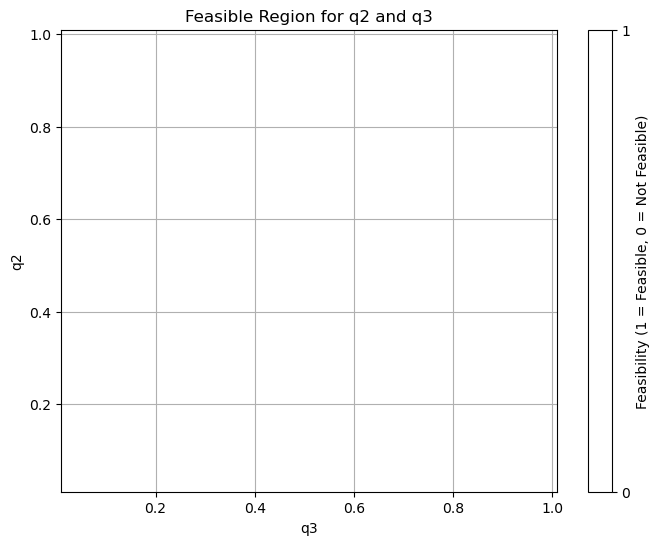

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_costs(q1, q2, q3, cm, ch):
    """Calculate costs for the different configurations."""
    # Costs for full automation of all tasks separately
    C_123 = cm * (1/q1 + 1/q2 + 1/q3)

    # Costs for partial automation (tasks 1 and 2 combined, task 3 human-assisted)
    C_12_3 = cm * (1 / (q1 * q2) + 1/q3)

    # Costs for partial automation (task 1 human-assisted, tasks 2 and 3 combined)
    C_1_23 = cm * (1/q1 +(1/ (q2 * q3)))

    # Costs for full automation of all tasks combined
    C_full = cm / (q1 * q2 * q3)

    return C_123, C_12_3, C_1_23, C_full

def find_feasible_ranges(q1=0.8, cm=1, ch=2, q2_range=(0, 1.0), q3_range=(0.0, 1.0), step=0.05):
    """Find ranges of q2 and q3 that satisfy the conditions."""
    q2_values = np.arange(q2_range[0], q2_range[1] + step, step)
    q3_values = np.arange(q3_range[0], q3_range[1] + step, step)

    feasible_grid = np.zeros((len(q2_values), len(q3_values)))

    for i, q2 in enumerate(q2_values):
        q2_shock = max(1, 1.25 * q2)  # Apply the 10% shock to q2
        for j, q3 in enumerate(q3_values):
            # Calculate costs before and after the shock
            C_123, C_12_3, C_1_23, C_full = calculate_costs(q1, q2, q3, cm, ch)
            C_mid = cm / (q1 * q2_shock) + ch
            C_123_shock, C_12_3_shock, C_1_23_shock, C_full_shock = calculate_costs(q1, q2_shock, q3, cm, ch)

            # Check conditions
            if C_full < 1e10:
                feasible_grid[i, j] = 1
                # C_123 < C_1_23 and C_123 < C_12_3 and C_123 < C_full:
                # if C_mid < C_123_shock:
                #     if C_mid < C_12_3_shock and C_mid < C_1_23_shock and C_mid < C_full_shock:
                #         feasible_grid[i, j] = 1

    return q2_values, q3_values, feasible_grid

def plot_feasible_region(q2_values, q3_values, feasible_grid):
    """Plot the feasible region on a q2-q3 grid."""
    plt.figure(figsize=(8, 6))
    Q2, Q3 = np.meshgrid(q3_values, q2_values)
    plt.contourf(Q2, Q3, feasible_grid, levels=[0, 1], colors=["white", "lightblue"], alpha=0.7)
    plt.xlabel("q3")
    plt.ylabel("q2")
    plt.title("Feasible Region for q2 and q3")
    plt.colorbar(label="Feasibility (1 = Feasible, 0 = Not Feasible)")
    plt.grid()
    plt.show()

# Parameters
q1 = 0.8
cm = 1
ch = 10
q2_range = (0.01, .99)
q3_range = (0.01, .99)
step = 0.05

# Find feasible ranges
q2_values, q3_values, feasible_grid = find_feasible_ranges(q1, cm, ch, q2_range, q3_range, step)

# Plot the feasible region
plot_feasible_region(q2_values, q3_values, feasible_grid)
